In [ ]:
import os

# Get the current directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# List the files in the current directory
files = os.listdir(current_directory)
print("Files in the current directory:", files)

Current directory: /content
Files in the current directory: ['.config', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_csv("./sample_data/HDIdata.csv")
df = df.dropna()
df

,HDI rank,Country,1990,2000,2010,2015,2018,2019,2020,2021
0,1,Switzerland,0.851,0.887,0.942,0.954,0.959,0.962,0.956,0.962
1,2,Norway,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961
2,3,Iceland,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959
4,5,Australia,0.865,0.896,0.923,0.933,0.941,0.941,0.947,0.951
5,6,Denmark,0.834,0.889,0.913,0.936,0.942,0.946,0.947,0.948
...,...,...,...,...,...,...,...,...,...,...
184,185,Mozambique,0.238,0.303,0.402,0.440,0.451,0.456,0.453,0.446
185,186,Mali,0.237,0.317,0.404,0.416,0.430,0.433,0.427,0.428
186,187,Burundi,0.290,0.297,0.405,0.428,0.428,0.431,0.426,0.426
187,188,Central African Republic,0.338,0.329,0.372,0.384,0.405,0.411,0.407,0.404


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
average = df["1990"].mean()
average

0.5959503546099291

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
i = 0
averages = []
for column_name in df.columns:
    if i < 2:
      i += 1
      continue
    average = df[column_name].mean()
    averages.append(average)
# Sample data
x = np.array([int(col) for col in df.columns if col != "HDI rank" and col != "Country" ])
y = averages

# Create a figure and axes
# fig, ax = plt.subplots()
# Plot the data
# ax.plot(df.columns[2:], y)

# Set labels and title

def get_equation(fit_coeffs):
  equation = "y = $"
  degree = len(fit_coeffs) - 1
  for i, coeff in enumerate(fit_coeffs):
      power = degree - i
      if power > 1:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}x^{power}"
      elif power == 1:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}x"
      else:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}"
      if i < degree:
        equation += " + "
  return equation

def get_r2_score():
  from sklearn.metrics import r2_score
  y_pred = polynomial_func(x, *fit_coeffs)
  r2 = r2_score(y, y_pred)
  return r2

def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate the line of best fit
line_of_best_fit = m * x + b

# Plot the data points and the line of best fit
plt.figure(figsize=(16.51, 6))
plt.scatter(x, y, label='Data Points')
plt.legend()
plt.xlabel('Years')
plt.ylabel('HDI')
plt.title('Health Development Index')
# score = get_r2_score()
r = np.corrcoef(x, y)[0, 1]
plt.annotate("$R = " + str(round(r, 3)) + "$", xy=(0.615, 1.015), xycoords='axes fraction', fontsize=10)
plt.plot(x, line_of_best_fit, label='Line of Best Fit')
plt.show()

NameError: ignored

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Assuming 'x' and 'y' are your input data arrays

# Define the polynomial function
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)
def get_equation(fit_coeffs):
  equation = "y = $"
  degree = len(fit_coeffs) - 1
  for i, coeff in enumerate(fit_coeffs):
      power = degree - i
      if power > 1:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}x^{power}"
      elif power == 1:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}x"
      else:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}"
      if i < degree:
        equation += " + "
  return equation + "$"

# Perform curve fitting
initial_guess = [1, 1, 1]  # Initial guess for the coefficients
fit_coeffs, _ = curve_fit(polynomial_func, x, y, p0=initial_guess)
# Generate a smooth curve using the fitted coefficients
x_smooth = np.linspace(min(x), max(x), 100)
y_smooth = polynomial_func(x_smooth, *fit_coeffs)

# Plot the original data points and the fitted curve
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x_smooth, y_smooth, label='Fitted Curve')
plt.legend()
equation = get_equation(fit_coeffs)

plt.annotate(equation, xy=(0.6, 1.015), xycoords='axes fraction', fontsize=10)
plt.title('Gross Domestic Product')
plt.xlabel("Years")
plt.ylabel("GDP")
plt.show()

NameError: ignored

In [ ]:
# Get the equation of the regression
equation = "y = "
degree = len(fit_coeffs) - 1
for i, coeff in enumerate(fit_coeffs):
    power = degree - i
    equation += f"{coeff:.2f}x^{power}"
    if i < degree:
        equation += " + "
equation

'y = 3.94x^2 + -15386.35x^1 + 15019167.38x^0'

In [ ]:
from sklearn.metrics import r2_score
y_pred = polynomial_func(x, *fit_coeffs)
r2 = r2_score(y, y_pred)
r2

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df2 = pd.read_csv("./sample_data/GDP.csv")
df2 = df2.dropna()
df2 = df2.rename(columns={'Country Name': 'Country'})
df2

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,209.414665,211.707060,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
3,Africa Western and Central,AFW,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,142.895375,127.303606,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
13,Australia,AUS,1810.510249,1877.509803,1854.552575,1967.014259,2131.277657,2280.902108,2343.706917,2579.986339,...,68044.714820,68158.579740,62513.411220,56710.445720,49875.565140,53936.140250,57207.871510,54941.434180,51720.370760,60443.109160
14,Austria,AUT,935.460427,1031.815004,1087.834243,1167.000532,1269.412583,1374.532140,1486.968606,1569.667183,...,48564.917340,50731.127250,51786.377170,44195.817590,45307.587860,47429.158460,51466.556560,50070.403350,48809.226880,53637.705710
16,Burundi,BDI,71.360224,72.088782,73.942008,78.948269,85.964725,50.990420,51.808640,54.450305,...,238.205949,241.547671,257.818552,289.359633,242.065671,243.135809,231.446476,216.972968,216.826741,221.477676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,St. Vincent and the Grenadines,VCT,155.293588,163.424034,166.602193,154.653976,163.883606,165.126044,173.196917,167.777520,...,6754.370184,7117.554763,7210.616623,7386.737595,7684.779208,8030.585057,8399.694011,8674.371009,8335.256476,8666.387041
259,World,WLD,459.258877,471.478181,495.867174,523.439951,561.348693,599.077420,636.708777,663.848225,...,10572.957670,10735.129020,10896.145030,10153.581300,10206.892280,10742.650460,11285.497640,11320.915880,10883.076050,12236.615740
263,South Africa,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,ZMB,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633


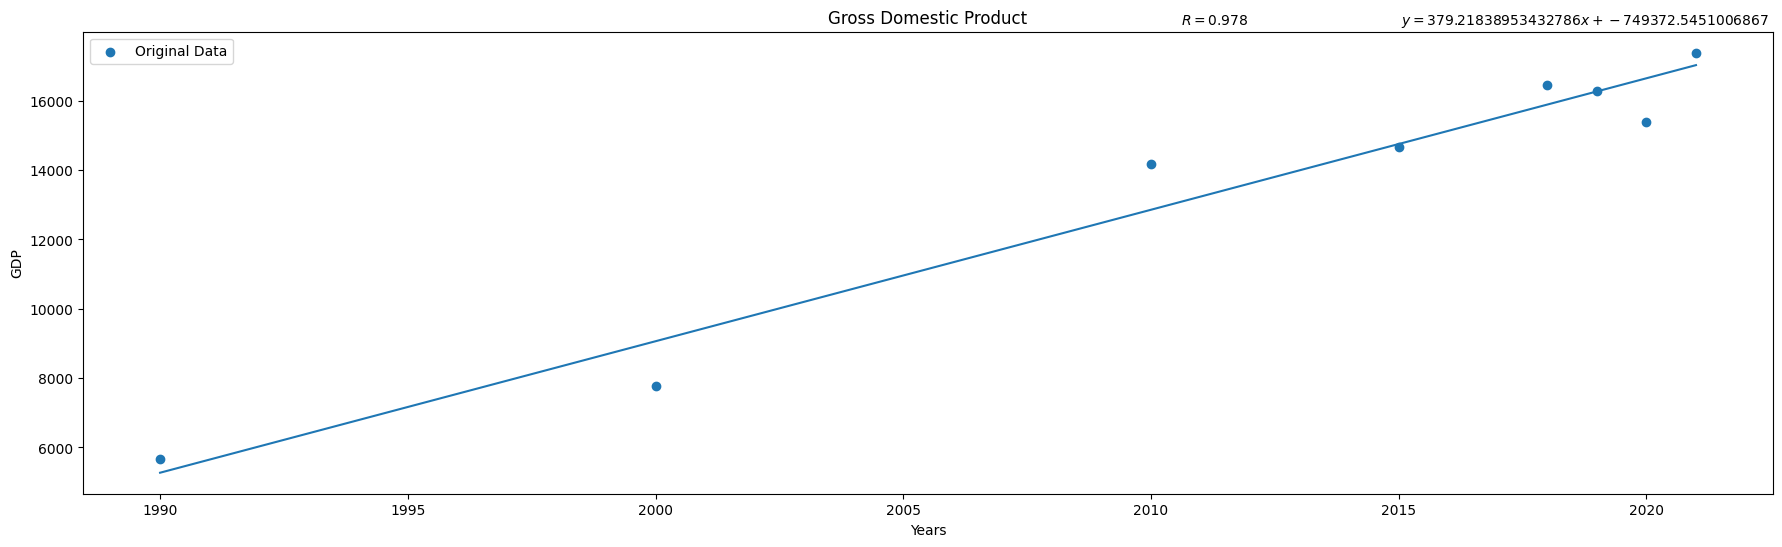

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df2 = pd.read_csv("./sample_data/GDP.csv")
df2 = df2.dropna()
# df2 = df2.rename(columns={'Country Name': 'Country'})
i = 0
averages = []
for column_name in df2.columns:
    if i < 2:
      i += 1
      continue
    if column_name in df.columns:
      average = df2[column_name].mean()
      averages.append(average)

def get_r2_score():
  from sklearn.metrics import r2_score
  y_pred = polynomial_func(x, *fit_coeffs)
  r2 = r2_score(y, y_pred)
  return r2

# Sample data
# x = [i for i in range(1960, 1959 + len(df2.columns) - 1)]
x = np.array([int(col) for col in df.columns if col != "HDI rank" and col != "Country" ])
y = averages

# Create a figure and axes
# fig, ax = plt.subplots()
# # Plot the data
# ax.plot(x, y)
# initial_guess = [1, 1, 1]  # Initial guess for the coefficients
# fit_coeffs, _ = curve_fit(polynomial_func, x, y, p0=initial_guess)
# # Generate a smooth curve using the fitted coefficients
# x_smooth = np.linspace(min(x), max(x), 100)
# y_smooth = polynomial_func(x_smooth, *fit_coeffs)

coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate the line of best fit
line_of_best_fit = m * x + b

# Set labels and title
plt.figure(figsize=(21.8, 6))
plt.scatter(x, y, label='Original Data')
plt.legend()
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('Gross Domestic Product')
# score = get_r2_score()
r = np.corrcoef(x, y)[0, 1]
plt.plot(x, line_of_best_fit, label='Line of Best Fit')
plt.annotate("$R = " + str(round(r, 3)) + "$", xy=(0.65, 1.015), xycoords='axes fraction', fontsize=10)
plt.annotate(f"$y = {m}x + {b}$", xy=(0.78, 1.015), xycoords='axes fraction', fontsize=10)
plt.show()

In [ ]:
import pandas as pd
df2 = pd.read_csv("./sample_data/GDP.csv")
df2 = df2.dropna()
df2 = df2.rename(columns={'Country Name': 'Country'})
merged_df = pd.merge(df, df2, on='Country', how='inner')
overlapping_columns = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y') or col == "Country"]
df_overlapping = merged_df.drop([col for col in merged_df.columns if not col in overlapping_columns], axis=1)
final_df = df_overlapping
final_df

,Country,1990_x,2000_x,2010_x,2015_x,2018_x,2019_x,2020_x,2021_x,1990_y,2000_y,2010_y,2015_y,2018_y,2019_y,2020_y,2021_y
0,Norway,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961,28242.943740,38131.460610,87693.790070,74355.515860,82267.809320,75719.752900,67329.677790,89154.276090
1,Iceland,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959,25384.915020,32096.372260,43237.072950,52951.681510,74461.480000,68853.715220,59200.177940,68727.636660
2,Australia,0.865,0.896,0.923,0.933,0.941,0.941,0.947,0.951,18249.709480,21853.781670,52134.308850,56710.445720,57207.871510,54941.434180,51720.370760,60443.109160
3,Sweden,0.810,0.904,0.910,0.937,0.942,0.947,0.942,0.947,30593.672440,29624.912670,52869.044290,51545.483610,54589.060390,51939.429740,52837.903980,61028.738060
4,Ireland,0.737,0.847,0.904,0.925,0.937,0.942,0.943,0.945,14031.302570,26334.567210,48663.600440,62053.984440,79250.387850,80927.074670,85420.190860,100172.079300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Sudan,0.336,0.424,0.486,0.508,0.514,0.514,0.510,0.508,1301.819092,378.161163,1706.415649,2226.421631,769.869141,748.010925,608.332519,751.821350
67,Sierra Leone,0.312,0.318,0.427,0.453,0.470,0.480,0.475,0.477,150.193422,138.713942,400.520002,576.740232,519.650016,506.606894,493.478777,480.039211
68,Burundi,0.290,0.297,0.405,0.428,0.428,0.431,0.426,0.426,206.444928,138.004617,222.660589,289.359633,231.446476,216.972968,216.826741,221.477676
69,Central African Republic,0.338,0.329,0.372,0.384,0.405,0.411,0.407,0.404,512.850856,243.877580,459.776947,351.879754,435.932264,426.408763,435.469252,461.137490


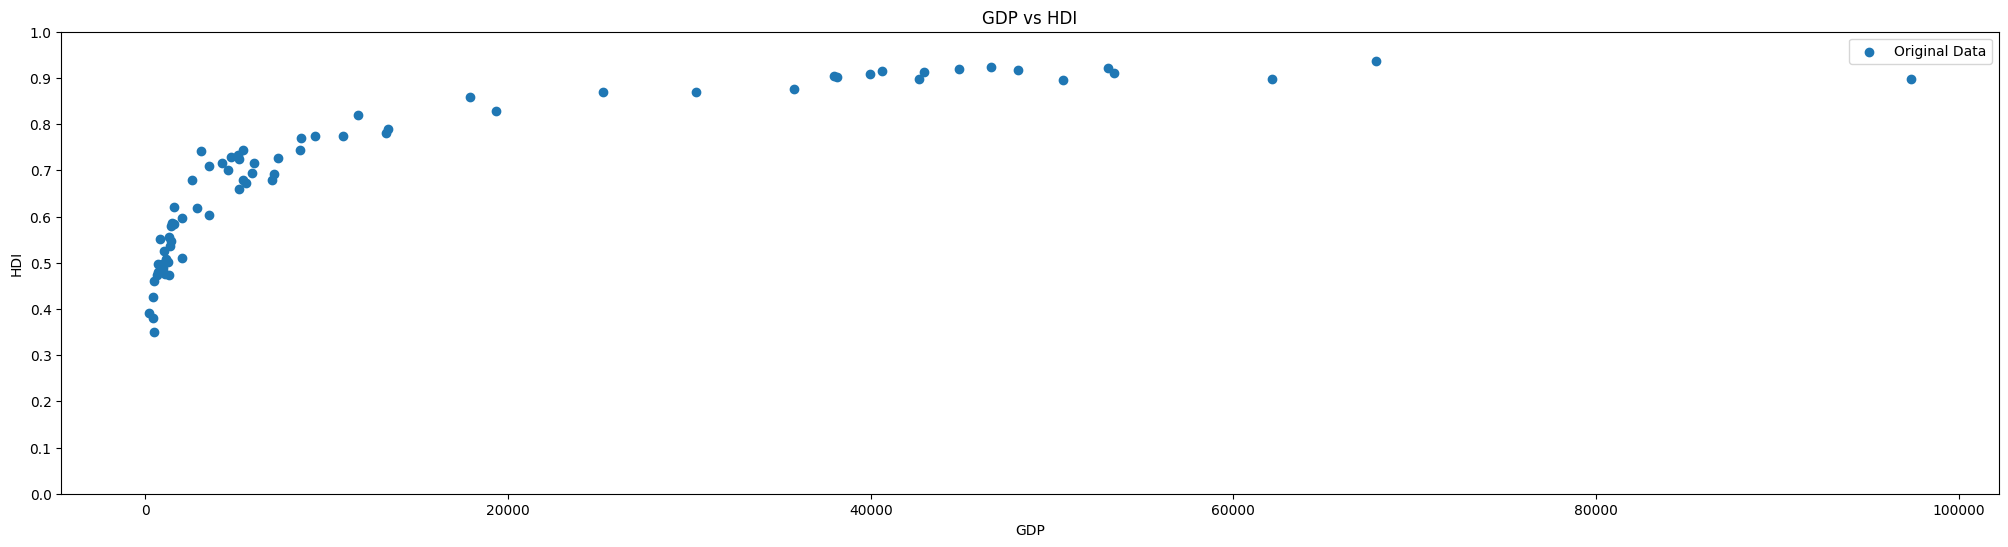

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

averages_x = []
for k in range(len(final_df['HDI in 1990'])):
  sum = 0
  counter = 0
  for column_name in final_df.columns:
      if column_name.startswith('HDI'):
        counter += 1
        sum += final_df[column_name][k]
  average = sum / counter
  averages_x.append(average)
averages_y = []
for k in range(len(final_df['HDI in 1990'])):
  sum = 0
  counter = 0
  for column_name in final_df.columns:
      if column_name.startswith('GDP'):
        counter += 1
        sum += final_df[column_name][k]
  average = sum / counter
  averages_y.append(average)

# Assuming 'x' and 'y' are your input data arrays
x = averages_y
y = averages_x

# Define the polynomial function
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

def get_equation(fit_coeffs):
  equation = "y = $"
  degree = len(fit_coeffs) - 1
  for i, coeff in enumerate(fit_coeffs):
      power = degree - i
      if power > 1:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}x^{power}"
      elif power == 1:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}x"
      else:
        if coeff < 0:
          equation = equation[:-2]
        equation += f"{coeff}"
      if i < degree:
        equation += " + "
  return equation

def get_r2_score():
  from sklearn.metrics import r2_score
  y_pred = polynomial_func(x, *fit_coeffs)
  r2 = r2_score(y, y_pred)
  return r2

# Perform curve fitting
initial_guess = [1, 1, 1]  # Initial guess for the coefficients
fit_coeffs, _ = curve_fit(polynomial_func, x, y, p0=initial_guess)
# Generate a smooth curve using the fitted coefficients
x_smooth = np.linspace(min(x), max(x), 100)
y_smooth = polynomial_func(x_smooth, *fit_coeffs)

# Plot the original data points and the fitted curve
import matplotlib.pyplot as plt
# plt.xticks(x)
plt.figure(figsize=(25, 6))
plt.scatter(x, y, label='Original Data')
# plt.plot(x_smooth, y_smooth, label='Fitted Curve')
plt.legend()
plt.xlabel('GDP')
plt.ylabel('HDI')
plt.title('GDP vs HDI')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# equation = get_equation(fit_coeffs)
# plt.annotate(equation, xy=(0.674, 1.015), xycoords='axes fraction', fontsize=10)
score = get_r2_score()
# plt.annotate("$R^2 = " + str(round(score, 3)) + "$", xy=(0.584, 1.015), xycoords='axes fraction', fontsize=10)
plt.show()

In [ ]:
df3 = pd.DataFrame({'GDP': x, 'HDI': y})
df3.to_csv('./sample_data/GDPvsHDI.csv', index=False)

In [ ]:
# Get the equation of the regression
equation = "y = "
degree = len(fit_coeffs) - 1
for i, coeff in enumerate(fit_coeffs):
    power = degree - i
    equation += f"{coeff}x^{power}"
    if i < degree:
        equation += " + "
equation
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = polynomial_func(x, *fit_coeffs)
r2 = r2_score(y, y_pred)
r2

0.7772311982670268

In [ ]:
for col in final_df.columns:
  if col.endswith('_x'):
    final_df = final_df.rename(columns={col: "HDI in " + col[:-2]})
final_df

,Country,HDI in 1990,HDI in 2000,HDI in 2010,HDI in 2015,HDI in 2018,HDI in 2019,HDI in 2020,HDI in 2021,1990_y,2000_y,2010_y,2015_y,2018_y,2019_y,2020_y,2021_y
0,Norway,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961,28242.943740,38131.460610,87693.790070,74355.515860,82267.809320,75719.752900,67329.677790,89154.276090
1,Iceland,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959,25384.915020,32096.372260,43237.072950,52951.681510,74461.480000,68853.715220,59200.177940,68727.636660
2,Australia,0.865,0.896,0.923,0.933,0.941,0.941,0.947,0.951,18249.709480,21853.781670,52134.308850,56710.445720,57207.871510,54941.434180,51720.370760,60443.109160
3,Sweden,0.810,0.904,0.910,0.937,0.942,0.947,0.942,0.947,30593.672440,29624.912670,52869.044290,51545.483610,54589.060390,51939.429740,52837.903980,61028.738060
4,Ireland,0.737,0.847,0.904,0.925,0.937,0.942,0.943,0.945,14031.302570,26334.567210,48663.600440,62053.984440,79250.387850,80927.074670,85420.190860,100172.079300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Sudan,0.336,0.424,0.486,0.508,0.514,0.514,0.510,0.508,1301.819092,378.161163,1706.415649,2226.421631,769.869141,748.010925,608.332519,751.821350
67,Sierra Leone,0.312,0.318,0.427,0.453,0.470,0.480,0.475,0.477,150.193422,138.713942,400.520002,576.740232,519.650016,506.606894,493.478777,480.039211
68,Burundi,0.290,0.297,0.405,0.428,0.428,0.431,0.426,0.426,206.444928,138.004617,222.660589,289.359633,231.446476,216.972968,216.826741,221.477676
69,Central African Republic,0.338,0.329,0.372,0.384,0.405,0.411,0.407,0.404,512.850856,243.877580,459.776947,351.879754,435.932264,426.408763,435.469252,461.137490


In [ ]:
for col in final_df.columns:
  if col.endswith('_y'):
    final_df = final_df.rename(columns={col: "GDP in " + col[:-2]})
final_df

,Country,HDI in 1990,HDI in 2000,HDI in 2010,HDI in 2015,HDI in 2018,HDI in 2019,HDI in 2020,HDI in 2021,GDP in 1990,GDP in 2000,GDP in 2010,GDP in 2015,GDP in 2018,GDP in 2019,GDP in 2020,GDP in 2021
0,Norway,0.838,0.913,0.941,0.953,0.962,0.961,0.959,0.961,28242.943740,38131.460610,87693.790070,74355.515860,82267.809320,75719.752900,67329.677790,89154.276090
1,Iceland,0.811,0.871,0.902,0.945,0.959,0.960,0.957,0.959,25384.915020,32096.372260,43237.072950,52951.681510,74461.480000,68853.715220,59200.177940,68727.636660
2,Australia,0.865,0.896,0.923,0.933,0.941,0.941,0.947,0.951,18249.709480,21853.781670,52134.308850,56710.445720,57207.871510,54941.434180,51720.370760,60443.109160
3,Sweden,0.810,0.904,0.910,0.937,0.942,0.947,0.942,0.947,30593.672440,29624.912670,52869.044290,51545.483610,54589.060390,51939.429740,52837.903980,61028.738060
4,Ireland,0.737,0.847,0.904,0.925,0.937,0.942,0.943,0.945,14031.302570,26334.567210,48663.600440,62053.984440,79250.387850,80927.074670,85420.190860,100172.079300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Sudan,0.336,0.424,0.486,0.508,0.514,0.514,0.510,0.508,1301.819092,378.161163,1706.415649,2226.421631,769.869141,748.010925,608.332519,751.821350
67,Sierra Leone,0.312,0.318,0.427,0.453,0.470,0.480,0.475,0.477,150.193422,138.713942,400.520002,576.740232,519.650016,506.606894,493.478777,480.039211
68,Burundi,0.290,0.297,0.405,0.428,0.428,0.431,0.426,0.426,206.444928,138.004617,222.660589,289.359633,231.446476,216.972968,216.826741,221.477676
69,Central African Republic,0.338,0.329,0.372,0.384,0.405,0.411,0.407,0.404,512.850856,243.877580,459.776947,351.879754,435.932264,426.408763,435.469252,461.137490


In [ ]:
pd.DataFrame({"Country": list(final_df['Country'])}).to_csv("./sample_data/countries.csv")

In [ ]:
final_df.to_csv("./sample_data/mergedData.csv")

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution

# Generate points along the x-axis
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

# Calculate the corresponding y-values using the probability density function (PDF) of the normal distribution
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))

# Plot the normal distribution curve
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Show the plot
plt.show()

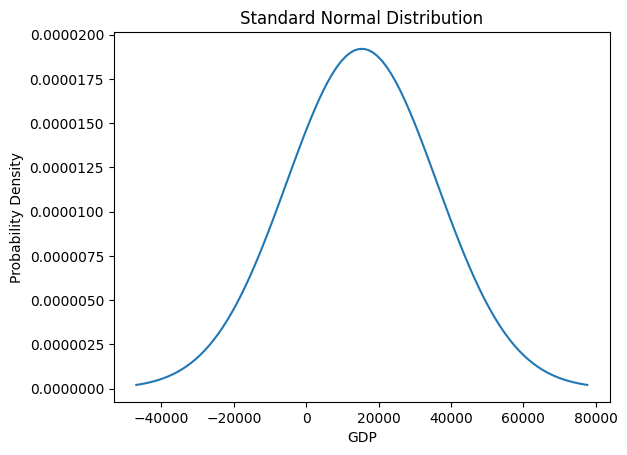

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the standard normal distribution
mean = 15374.50576
std_dev = 20770.27162

# Generate points along the x-axis
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

# Calculate the corresponding y-values using the probability density function (PDF) of the standard normal distribution
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))

# Set y-axis tick label format to plain (avoid scientific notation)
plt.ticklabel_format(style='plain')

# Plot the standard normal distribution curve
plt.plot(x, y)

# Add labels and title
plt.xlabel('GDP')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')

# Show the plot
plt.show()

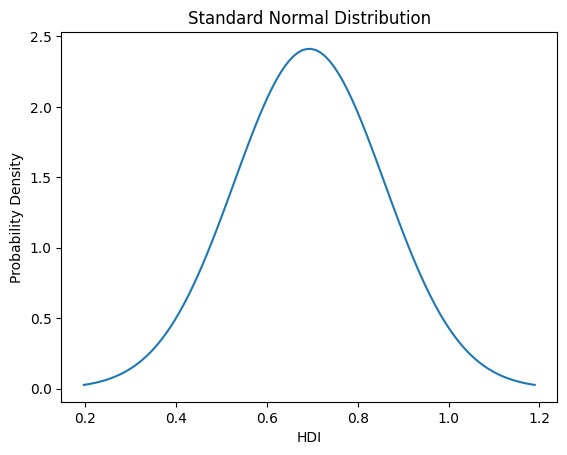

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the standard normal distribution
mean = 0.6933028169
std_dev = 0.1654110645

# Generate points along the x-axis
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

# Calculate the corresponding y-values using the probability density function (PDF) of the standard normal distribution
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))

# Set y-axis tick label format to plain (avoid scientific notation)
plt.ticklabel_format(style='plain')

# Plot the standard normal distribution curve
plt.plot(x, y)

# Add labels and title
plt.xlabel('HDI')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')

# Show the plot
plt.show()

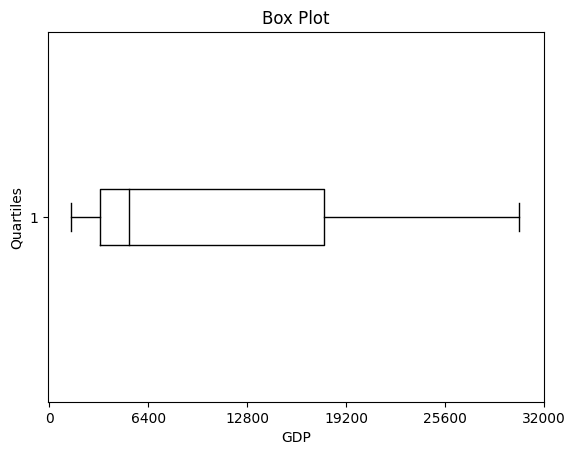

In [ ]:
import matplotlib.pyplot as plt

# Quartile values
q1 = 1381.632694
q2 = 5158.595751
q3 = 30388.23257
# Minimum and maximum values
minimum = 217.8992038
maximum = 32000
# Create a figure and axis
fig, ax = plt.subplots()

# Create the flipped horizontal box plot
bp = plt.boxplot([q1, q2, q3], vert=False)

num_ticks = 6  # Specify the desired number of ticks
x_ticks = np.linspace(0, maximum, num_ticks)
plt.xticks(x_ticks)

# Customize the box plot colors
bp['boxes'][0].set(color='black')
bp['whiskers'][0].set(color='black')
bp['whiskers'][1].set(color='black')
bp['caps'][0].set(color='black')
bp['caps'][1].set(color='black')
bp['medians'][0].set(color='black')

# Add labels and title
ax.set_xlabel('GDP')
ax.set_ylabel('Quartiles')
ax.set_title('Box Plot')

# Show the plot
plt.show()

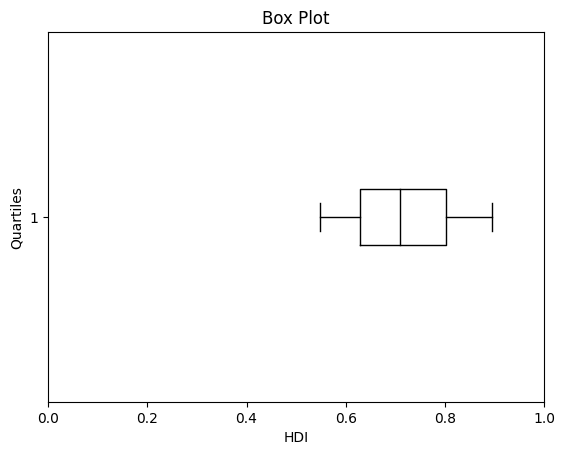

In [ ]:
import matplotlib.pyplot as plt

# Quartile values
q1 = 0.548625
q2 = 0.709375
q3 = 0.894875
# Minimum and maximum values
minimum = 0
maximum = 1
# Create a figure and axis
fig, ax = plt.subplots()

# Create the flipped horizontal box plot
bp = plt.boxplot([q1, q2, q3], vert=False)

num_ticks = 6  # Specify the desired number of ticks
x_ticks = np.linspace(0, maximum, num_ticks)
plt.xticks(x_ticks)

# Customize the box plot colors
bp['boxes'][0].set(color='black')
bp['whiskers'][0].set(color='black')
bp['whiskers'][1].set(color='black')
bp['caps'][0].set(color='black')
bp['caps'][1].set(color='black')
bp['medians'][0].set(color='black')

# Add labels and title
ax.set_xlabel('HDI')
ax.set_ylabel('Quartiles')
ax.set_title('Box Plot')

# Show the plot
plt.show()

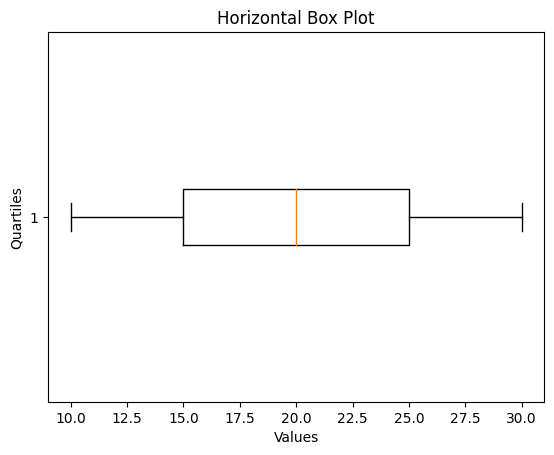

In [ ]:
import matplotlib.pyplot as plt

# Quartile values
q1 = 10
q2 = 20
q3 = 30

# Create the horizontal box plot
plt.boxplot([q1, q2, q3], vert=False)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Quartiles')
plt.title('Horizontal Box Plot')

# Show the plot
plt.show()